In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [30]:
hotelReviews = pd.read_csv('C:\Users\deniz\Documents\Hotel_Reviews.csv')
hotNames = list(hotelReviews['Hotel_Name'])
hotNames = [i.lower() for i in hotNames]
hotelReviews['Hotel_Name'] = hotNames

In [31]:
hotNames = hotelReviews['Hotel_Name']
hotNames = hotNames.drop_duplicates()
hotNames = list(hotNames)

In [ ]:
buzzWords = ['Hotel', 'Plaza', 'Grand', 'Suites', 'Spa',
             'Paris', 'Amsterdam', 'London', 'Milan', 'Milano','Roma', 'Barcelona', 'Vienna', 'Wien',
             'Saint', 'City', 'Elys', 'Champs', 'Eiffel', 'Kensington', 'Palace'
             'France', 'Netherlands', 'United Kingdom', 'Italy', 'Spain', 'Austria', 'The', 'tel', 'Park', 'catalonia']
buzzWords = [i.lower() for i in buzzWords]

allWords = []
for h in hotNames:
    #if 'marble' in h.lower().split():
    #    print h
    wordsInName = h.lower().split()
    for w in wordsInName:
        if len(w) > 2 and not w.isdigit() and w not in buzzWords:
            allWords.append(w)

In [ ]:
cnt = Counter(allWords)
cnt.most_common()

In [ ]:
allWords = []
for h in hotNames:
    wordsInName = h.lower().split()
    #twoCombs = [wordsInName[i]+' '+wordsInName[i+1] for i in range(len(wordsInName) - 1)]
    for i in range(len(wordsInName) - 1):
        w = wordsInName[i]
        w_p = wordsInName[i + 1]
        #if len(w) > 2 and not w.isdigit(): and w not in buzzWords:
        #    allWords.append(w)
        if len(w) > 2 and not w.isdigit() and w not in buzzWords and len(w_p) > 2 and not w_p.isdigit() and w_p not in buzzWords:
            allWords.append(w+' '+w_p)
            
cnt = Counter(allWords)
cnt.most_common()

In [32]:
hotelNames = ['Best Western', 'Mercure', 'Hilton','Novotel', 'Marriott', 
'Holiday Inn', 'Luxury Collection', 'NH Collection', 'Starhotels', 
'IH Hotels', 'Autograph Collection', 'Radisson Blu']

hotelNames = [i.lower() for i in hotelNames]

In [76]:
ctyDF = pd.DataFrame(index=hotelNames, columns=['Bad', 'Average','Good', 'Excellent'])

for h in hotelNames:
    hns = list(hotelReviews['Hotel_Name'])
    hns = [True if h in hn else False for hn in hns]
    hotelMat = hotelReviews[hns]
    hotelMat = hotelMat[['Hotel_Name', 'Reviewer_Score']]
    reviews = hotelMat['Reviewer_Score']
    binRevs = []
    for r in reviews:
        if 0.0 < r <= 4:
            binRevs.append(0)
        elif 4 < r <= 6:
            binRevs.append(1)
        elif 6 < r <= 8:
            binRevs.append(2)
        elif 8 < r <= 10.0:
            binRevs.append(3)
            
    rArr = np.array(np.array(binRevs))
    badR = 1.0 * sum(rArr == 0)
    avgR = 1.0 * sum(rArr == 1)
    goodR = 1.0 * sum(rArr == 2)
    excR = 1.0 * sum(rArr  == 3)

        #binRevs = [ np.round(10000 * badR / rArr.shape[0]) / 100, 
        #            np.round(10000 * avgR / rArr.shape[0]) / 100,
        #            np.round(10000 * goodR / rArr.shape[0]) / 100,
        #            np.round(10000 * excR / rArr.shape[0]) / 100]

    binRevs = [ np.round(100 * badR / rArr.shape[0]),
                np.round(100 * avgR / rArr.shape[0]),
                np.round(100 * goodR / rArr.shape[0]),
                np.round(100 * excR / rArr.shape[0])]


    ctyDF['Bad'][h] = binRevs[0]
    ctyDF['Average'][h] = binRevs[1]
    ctyDF['Good'][h] = binRevs[2]
    ctyDF['Excellent'][h] = binRevs[3]
        
        
    #hotelMat['Review_Labels'] = binRevs
    #hotelMat['Hotel_Name']
    #print h, hotelMat.shape

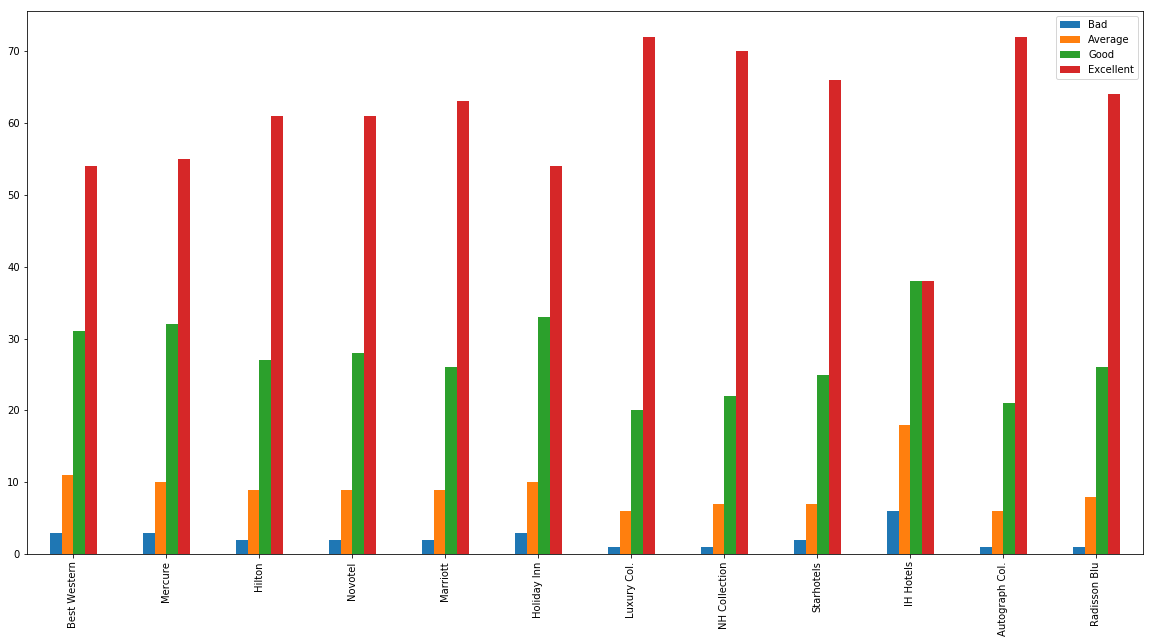

In [81]:
ctyDF2= pd.DataFrame(index=['Best Western', 'Mercure', 'Hilton','Novotel', 'Marriott', 'Holiday Inn', 'Luxury Col.', 'NH Collection', 'Starhotels', 'IH Hotels', 'Autograph Col.', 'Radisson Blu'], columns=['Bad', 'Average', 'Good', 'Excellent'])

ctyDF2['Bad'] = list(ctyDF['Bad'])
ctyDF2['Average'] = list(ctyDF['Average'])
ctyDF2['Good'] = list(ctyDF['Good'])
ctyDF2['Excellent'] = list(ctyDF['Excellent'])

fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 20
fig_size[1] = 10


ctyDF2.plot.bar()

plt.savefig('Franchise Hotel Review Distributions')
plt.show()


In [60]:
ctyDF = pd.DataFrame(index=hotelNames, columns=['No of Hotels'])
ctyDF2= pd.DataFrame(index=['Best Western', 'Mercure', 'Hilton','Novotel', 'Marriott', 'Holiday Inn', 'Luxury Col.', 'NH Collection', 'Starhotels', 'IH Hotels', 'Autograph Col.', 'Radisson Blu'], columns=['No of Hotels'])

for h in hotelNames:
    hns = list(hotelReviews['Hotel_Name'])
    hns = [hn if h in hn else False for hn in hns]
    totHotels = len(set(hns)) - 1
    ctyDF['No of Hotels'][h] = totHotels
    #print h, totHotels
ctyDF2['No of Hotels'] = list(ctyDF['No of Hotels'])

In [72]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
ctyDF2.plot.bar()
plt.title('No of hotels per franchise')
#plt.show()
plt.savefig('No of hotels per franchise')


In [68]:
ctyDF2

,No of Hotels
Best Western,55
Mercure,50
Hilton,43
Novotel,26
Marriott,25
Holiday Inn,25
Luxury Col.,7
NH Collection,8
Starhotels,10
IH Hotels,5
